In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
stock_price  = pd.read_csv('tesla.csv')

In [3]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [6]:
stock_price.shape

(2193, 7)

In [7]:
#store the last row of the data
actual_price = stock_price.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
2192,15-03-2019,283.51001,283.723999,274.399994,275.429993,275.429993,14758243


In [8]:
#removing the last row from the data
stock_price = stock_price.head(len(stock_price)-1)
stock_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2187,08-03-2019,276.910004,285.589996,275.890015,284.140015,284.140015,8819600
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700


In [9]:
days = list()
adj_close_prices = list()

In [10]:
df_days = stock_price.loc[:,'Date']
df_adj_close = stock_price.loc[:,'Adj Close']

In [11]:
#Create the independent dataset of date
for day in df_days:
    days.append([int(day.split('-')[2])])
#Create the dependent dataset of date    
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [12]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

# poly_svr = SVR(kernel='poly', C=1000.0 , degree=2)
# poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.85)

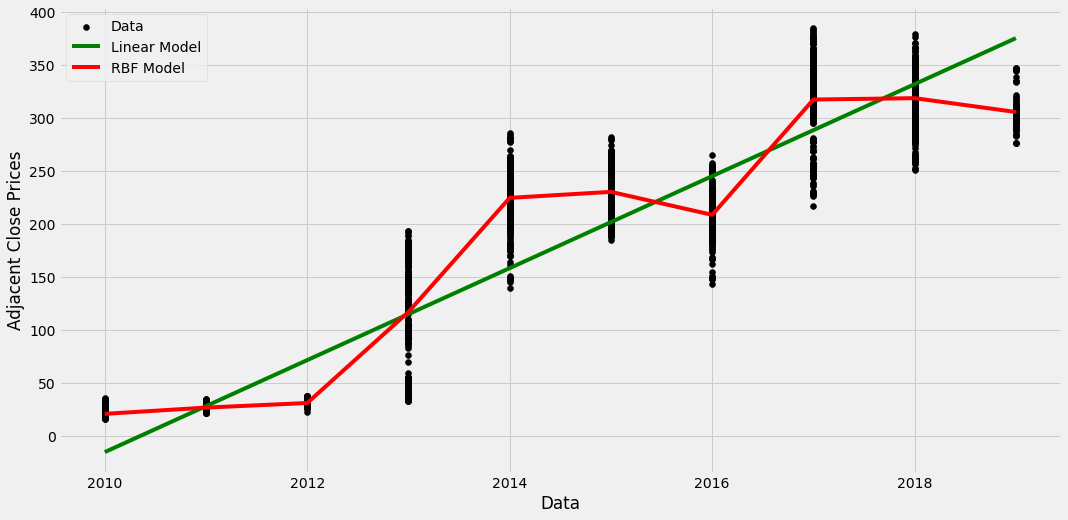

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color='black', label='Data')
plt.plot(days, lin_svr.predict(days), color= 'green', label='Linear Model')
plt.plot(days, rbf_svr.predict(days), color= 'red', label='RBF Model')
plt.xlabel('Data')
plt.ylabel('Adjacent Close Prices')
plt.legend()
plt.show()

In [28]:
day = [[15]]
print('the RBF Model predicted the tesla stocks price would be:', rbf_svr.predict(day))
print('the linear Model predicted the tesla stocks price would be:', lin_svr.predict(day))

the RBF Model predicted the tesla stocks price would be: [178.87395045]
the linear Model predicted the tesla stocks price would be: [-86573.1806092]


In [21]:
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
2192,15-03-2019,283.51001,283.723999,274.399994,275.429993,275.429993,14758243
